# Option Valuation Project

In [ ]:
from numpy import *
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

1D - Brownian Motion (Wiener Process)

In [ ]:
r = 0.02        # risk-free rate
S0 = 100        # current price of the underlying stock  
sigma = 0.25    # volatility
 
T = 1/6         # years to expiry (2 months) 

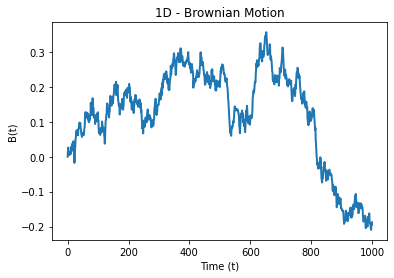

In [ ]:
numSteps = 1000    # number of steps
numPaths = 1  # number of sample paths  
 
# dT is the time increment (in years)
dT = T / numSteps
    
# Create an empty array to store the realizations.
paths = np.zeros((numSteps + 1, numPaths))

random.seed(10)

# Generate paths
for iPath in range(numPaths):
    for iStep in range(numSteps):
        paths[iStep + 1, iPath] = paths[iStep, iPath] + np.sqrt(dT) * np.random.normal(0,1) 

# Plot one-dimensional Brownian motion
[plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    
plt.title('1D - Brownian Motion')
plt.xlabel('Time (t)')
plt.ylabel('B(t)')
plt.show()

2D - Brownian Motion

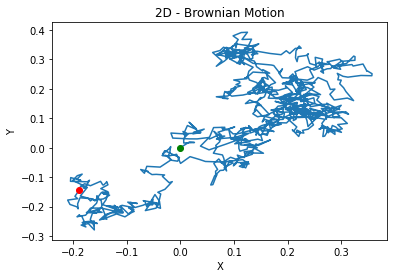

In [ ]:
numPaths = 2  # number of sample paths  
    
# Create an empty array to store the realizations.
paths = np.zeros((numSteps + 1, numPaths))

random.seed(10)

# Generate paths
for iPath in range(numPaths):
    for iStep in range(numSteps):
        paths[iStep + 1, iPath] = paths[iStep, iPath] + np.sqrt(dT) * np.random.normal(0,1) 

# Plot two-dimensional Brownian motion
plt.plot(paths[:,0],paths[:,1])

# Mark the start and end points.
plt.plot(paths[0,0],paths[0,1], 'go')
plt.plot(paths[-1,0], paths[-1,1], 'ro')
   
plt.title('2D - Brownian Motion')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Simulated Path 

In [ ]:
r = 0.02        # risk-free rate
S0 = 100        # current price of the underlying stock  
sigma = 0.25    # volatility
K = 105         # strike price at expiry
 
T = 1/6         # years to expiry (2 months)

numSteps = 8    # number of steps
numPaths = 256  # number of sample paths  

In [ ]:
def plot_path (S0, K, T, r, sigma, numSteps, numPaths):
   
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
        
    # First asset price is the initial price
    paths[0] = [S0] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((r - 0.5 * sigma ** 2) * dT
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    # Plot paths
    [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    
    plt.title('Simulated Path')
    plt.xlabel('Time')
    plt.ylabel('Price of underlying stock')
     
    return paths

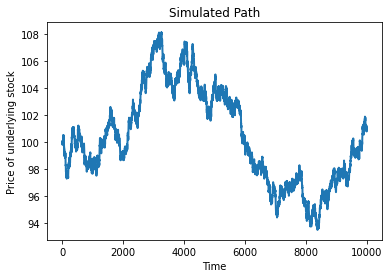

In [ ]:
random.seed(100)
paths = plot_path (S0, K, T, r, sigma, 10000, 1)

## 1. Monte Carlo Simulation
(a) (20 points) Compute the price of the following options using Monte Carlo Simulation with the sample size 250 or larger.
1. Asian call
2. Asian put
3. Fixed Lookback call
4. Fixed Lookback put
5. Floating lookback call
6. Floating lookback put

Assume that the risk-free rate is 2%, the underlying stock has the current price 100, and volatility 25%, with no dividend payments. All the options have a strike price $105 and the maturity 2 months. The simulation has the unit time = 1 week.

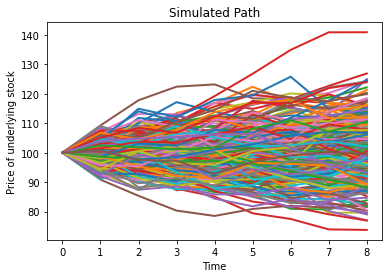

In [ ]:
paths = plot_path (S0, K, T, r, sigma, numSteps, numPaths)

### Asian Option

In [ ]:
def MC_Asian_Option(S0, K, T, r, sigma, numSteps, numPaths, paths):
   
    # Calculate the present value of payoff for each path for Call & Put 
    CallPayoffT = np.maximum(paths.mean(axis=0)-K,0) * np.exp(-r * T)
    PutPayoffT = np.maximum(K - paths.mean(axis=0), 0) * np.exp(-r * T)

    # Option price (sample mean)
    c  = np.mean(CallPayoffT)  
    p = np.mean(PutPayoffT)  
    
    # sample variance
    c_var = np.sum((CallPayoffT - c) ** 2) / (numPaths -1)
    p_var = np.sum((PutPayoffT - p) ** 2) / (numPaths -1)
    
    # 95% confidence interval
    c_sd = 1.96 * sqrt(c_var) / sqrt(numPaths)
    c_CI = [c - c_sd, c + c_sd]
    
    p_sd = 1.96 * sqrt(p_var) / sqrt(numPaths)
    p_CI = [p - p_sd, p + p_sd]
     
    return c, p, c_sd, p_sd, c_CI, p_CI

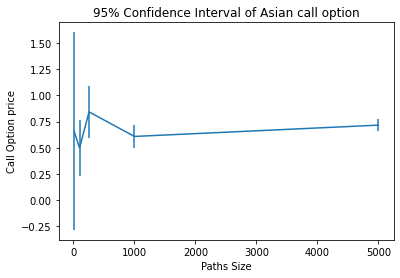

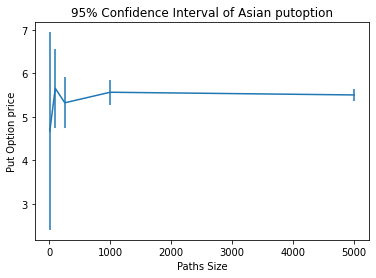

In [ ]:
Paths_size = [10,100, 256, 1000, 5000]

c_mean_list = []
c_sd_list = []
p_mean_list = []
p_sd_list = []

for i in Paths_size:
    paths_sample = plot_path (S0, K, T, r, sigma, numSteps, i)
    c, p, c_sd, p_sd, c_CI, p_CI = MC_Asian_Option (S0, K, T, r, sigma, numSteps, i, paths_sample)
    
    c_mean_list.append(c)
    c_sd_list.append(c_sd)
    
    p_mean_list.append(p)
    p_sd_list.append(p_sd)
    
# Plotting
plt.errorbar(Paths_size, c_mean_list, yerr=c_sd_list) 
plt.title('95% Confidence Interval of Asian call option')
plt.ylabel('Call Option price')
plt.xlabel('Paths Size')
plt.show()

plt.errorbar(Paths_size, p_mean_list, yerr=p_sd_list) 
plt.title('95% Confidence Interval of Asian putoption')
plt.ylabel('Put Option price')
plt.xlabel('Paths Size')
plt.show()

In [ ]:
# Implement Monte Carlo pricing procedure  

MC_asian_call, MC_asian_put, _ , _, MC_asian_call_CI, MC_asian_put_CI = MC_Asian_Option (S0, K, T, r, sigma, numSteps, numPaths, paths)

print('MC price of an Asian call option = ' + str(MC_asian_call)) 
print('MC price of an Asian put option = ' + str(MC_asian_put))  
print('')

print('MC 95% CI of an Asian call option = ' + str(MC_asian_call_CI)) 
print('MC 95% CI of an Asian put option = ' + str(MC_asian_put_CI))  

MC price of an Asian call option = 0.7250636823105046
MC price of an Asian put option = 5.470161780593193

MC 95% CI of an Asian call option = [0.4695181958484888, 0.9806091687725202]
MC 95% CI of an Asian put option = [4.887078368139749, 6.053245193046637]


### Fixed Lookback Option

In [ ]:
def MC_Lookback_Option(S0, K, T, r, sigma, numSteps, numPaths, paths):
     
    # Calculate the present value of payoff for each path for Call & Put 
    CallPayoffT = np.maximum(paths.max(axis=0)-K,0) * np.exp(-r * T)
    PutPayoffT = np.maximum(K - paths.min(axis=0), 0) * np.exp(-r * T)
 
    # Option price (sample mean)
    c  = np.mean(CallPayoffT)  
    p = np.mean(PutPayoffT) 
 
    # sample variance
    c_var = np.sum((CallPayoffT - c) ** 2) / (numPaths -1)
    p_var = np.sum((PutPayoffT - p) ** 2) / (numPaths -1)
    
    # 95% confidence interval
    c_sd = 1.96 * sqrt(c_var) / sqrt(numPaths)
    c_CI = [c - c_sd, c + c_sd]
    
    p_sd = 1.96 * sqrt(p_var) / sqrt(numPaths)
    p_CI = [p - p_sd, p + p_sd]

    return c, p, c_sd, p_sd, c_CI, p_CI

In [ ]:
# Implement Monte Carlo pricing procedure  

MC_Lookback_call, MC_Lookback_put, _ , _, MC_Lookback_call_CI, MC_Lookback_put_CI = MC_Lookback_Option (S0, K, T, r, sigma, numSteps, numPaths, paths)

print('MC price of a Fixed Lookback call option = ' + str(MC_Lookback_call)) 
print('MC price of a Fixed Lookback put option = ' + str(MC_Lookback_put))  
print('')

print('MC 95% CI of a Fixed Lookback call option = ' + str(MC_Lookback_call_CI)) 
print('MC 95% CI of a Fixed Lookback put option = ' + str(MC_Lookback_put_CI))  

MC price of a Fixed Lookback call option = 3.6994662762617874
MC price of a Fixed Lookback put option = 11.011199051542864

MC 95% CI of a Fixed Lookback call option = [3.0202702911224306, 4.378662261401145]
MC 95% CI of a Fixed Lookback put option = [10.308436271180893, 11.713961831904834]


### Floating lookback Lookback Option 

In [ ]:
def MC_Floating_Lookback_Option(S0, K, T, r, sigma, numSteps, numPaths, paths):
   
    # Calculate the present value of payoff for each path for Call & Put 
    CallPayoffT = np.maximum(paths[numSteps] - paths.min(axis=0), 0) * np.exp(-r * T)
    PutPayoffT = np.maximum(paths.max(axis=0) - paths[numSteps], 0) * np.exp(-r * T)
        
    # Option price (sample mean)
    c  = np.mean(CallPayoffT)  
    p = np.mean(PutPayoffT)  
 
    # sample variance
    c_var = np.sum((CallPayoffT - c) ** 2) / (numPaths -1)
    p_var = np.sum((PutPayoffT - p) ** 2) / (numPaths -1)
    
    # 95% confidence interval
    c_sd = 1.96 * sqrt(c_var) / sqrt(numPaths)
    c_CI = [c - c_sd, c + c_sd]
    
    p_sd = 1.96 * sqrt(p_var) / sqrt(numPaths)
    p_CI = [p - p_sd, p + p_sd]

    return c, p, c_sd, p_sd, c_CI, p_CI

In [ ]:
# Implement Monte Carlo pricing procedure  

MC_Floating_Lookback_call, MC_Floating_Lookback_put, _ , _, MC_Floating_Lookback_call_CI, MC_Floating_Lookback_put_CI = MC_Floating_Lookback_Option (S0, K, T, r, sigma, numSteps, numPaths, paths)

print('MC price of a Floating Lookback call option = ' + str(MC_Floating_Lookback_call)) 
print('MC price of a Floating Lookback put option = ' + str(MC_Floating_Lookback_put))  
print('')

print('MC 95% CI of a Floating Lookback call option = ' + str(MC_Floating_Lookback_call_CI)) 
print('MC 95% CI of a Floating Lookback put option = ' + str(MC_Floating_Lookback_put_CI))  

MC price of a Floating Lookback call option = 6.9278851727432125
MC price of a Floating Lookback put option = 6.01267305377011

MC 95% CI of a Floating Lookback call option = [6.0633121090794795, 7.7924582364069455]
MC 95% CI of a Floating Lookback put option = [5.285615626111458, 6.7397304814287615]


#### Print All Results

In [ ]:
print('MC price of an Asian call option = ', np.around(MC_asian_call,4))
print('MC price of an Asian put option = ', np.around(MC_asian_put,4))
print('')

print('MC 95% CI of an Asian call option = ', np.around(MC_asian_call_CI,4)) 
print('MC 95% CI of an Asian put option = ', np.around(MC_asian_put_CI,4))
print('')

print('MC price of a Fixed Lookback call option = ', np.around(MC_Lookback_call,4))
print('MC price of a Fixed Lookback put option = ', np.around(MC_Lookback_put,4))
print('')

print('MC 95% CI of a Fixed Lookback call option = ', np.around(MC_Lookback_call_CI,4)) 
print('MC 95% CI of a Fixed Lookback put option = ', np.around(MC_Lookback_put_CI,4)) 
print('')

print('MC price of a Floating Lookback call option = ', np.around(MC_Floating_Lookback_call,4)) 
print('MC price of a Floating Lookback put option = ', np.around(MC_Floating_Lookback_put,4)) 
print('')

print('MC 95% CI of a Floating Lookback call option = ', np.around(MC_Floating_Lookback_call_CI,4)) 
print('MC 95% CI of a Floating Lookback put option = ', np.around(MC_Floating_Lookback_put_CI,4)) 
      
 

MC price of an Asian call option =  0.7251
MC price of an Asian put option =  5.4702

MC 95% CI of an Asian call option =  [0.4695 0.9806]
MC 95% CI of an Asian put option =  [4.8871 6.0532]

MC price of a Fixed Lookback call option =  3.6995
MC price of a Fixed Lookback put option =  11.0112

MC 95% CI of a Fixed Lookback call option =  [3.0203 4.3787]
MC 95% CI of a Fixed Lookback put option =  [10.3084 11.714 ]

MC price of a Floating Lookback call option =  6.9279
MC price of a Floating Lookback put option =  6.0127

MC 95% CI of a Floating Lookback call option =  [6.0633 7.7925]
MC 95% CI of a Floating Lookback put option =  [5.2856 6.7397]


### American Put Option

In [ ]:
def sample_paths(r, sigma, S_0, T, M, N):
    """ simulate N numbers of length M+1 random stock price
    """
    paths = list()
    for i in range(N):
        path = [S_0]
        for j in range(M):
            new_price = path[-1]*np.exp((r-0.5*sigma**2)*T/M + np.random.normal()*sigma*np.sqrt(T/M))
            path.append(new_price)
        paths.append(path)
    return paths


def optimal_boundary_eval(S, P, K):
    """
    Enter the stock prices on all paths at a certain time,
    and the corresponding option price P, strike price K 
    The best execution price of American put named cutoff,
    Return the option price (corresponding to the order of input stock price) after applying the cutoff, 
    also return cutoff
    """ 
    length = len(S)
    data_pairs = [[S[i], P[i]] for i in range(length)]
    data_pairs = sorted(data_pairs, key=lambda x: x[0])
    new_P = list()

    total = 0
    total_max = 0
    cutoff = 0
    for i in range(length-1, -1, -1):
        total += data_pairs[i][1]
        total -= max(0, K-data_pairs[i][0])
        if total > total_max:
            total_max = total
            cutoff = data_pairs[i][0]

    for i in range(length):
        if S[i] < cutoff:
            new_P.append(max(K-S[i], 0))
        else:
            new_P.append(P[i])

    return (new_P, cutoff)


def MC_optimal_boundary_Ame_put(r, sigma, S_0, K, T, M, N):
    put_price = 0
    paths = sample_paths(r, sigma, S_0, T, M, N)

    #The stock price and option price at the time of execution of American put option.
    stock_prices = [paths[i][-1] for i in range(N)]
    put_prices = [max(K-stock_prices[i], 0) for i in range(N)]

    
    cutoffs = [0]*(M+1)
    cutoffs[-1] = K #Record the best execution boundary

    # backward method
    for i in range(M-1, -1, -1):
        for j in range(N):
            stock_prices[j] = paths[j][i]
            put_prices[j] = put_prices[j] * np.exp(-r*T/M)
        (put_prices, cutoffs[i]) = optimal_boundary_eval(stock_prices, put_prices, K)
        
    
    #expectation of put price 
    for i in range(N):
        put_price += put_prices[i]/N
   
    plt.plot(cutoffs)
    plt.xlabel("Time Increments")
    plt.ylabel("Stock Price")
    plt.title("optimal exercise boundary")
    return put_price


MC price of an American put option =  7.0912


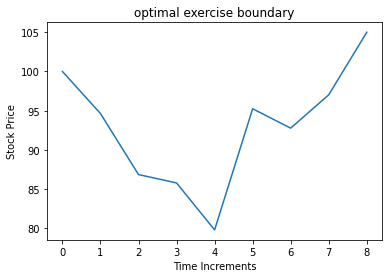

In [ ]:
Ame_put_price = MC_optimal_boundary_Ame_put(r, sigma, S0, K, T,numSteps, numPaths)
print('MC price of an American put option = ', np.around(Ame_put_price,4)) 

Text(0.5, 1.0, 'Geometric Brownian Motion')

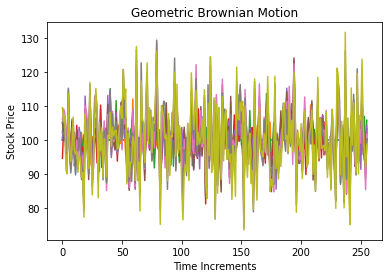

In [ ]:
p=sample_paths(r, sigma, S0, T, numSteps, numPaths)

plt.plot(p);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

## 2. Lattice

### Asian Option 

generate lattice paths, and probability of each possible path

In [ ]:
def Lattice_approach (S0, K, T, r, sigma, numSteps):
   
    numPaths = 2 ** numSteps
    paths = np.zeros((numSteps + 1, numPaths))
    prob = np.ones((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
    
    u = np.exp (sigma * np.sqrt(dT))
    d = 1 / u
    p = (np.exp(r * dT)-d) / (u-d)
    q = 1 - p
    
    # First asset price is the initial price
    paths[0] = [S0] * numPaths
 
    # Generate paths
    for i in range(numSteps):   
        paths[i+1] = paths[i] * (([u]*2**(numSteps-i-1) + [d]*2**(numSteps-i-1)) * 2**i)
   
    # Generate probability of payoff
    for i in range(numSteps):   
        prob[i+1] = prob[i] * (([p]*2**(numSteps-i-1) + [q]*2**(numSteps-i-1)) * 2**i)
    
    # Plot paths
    [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    
    plt.title('Lattice pricing procedure (Asian)')
    plt.xlabel('Time')
    plt.ylabel('Price of underlying stock')
    
    return paths,prob

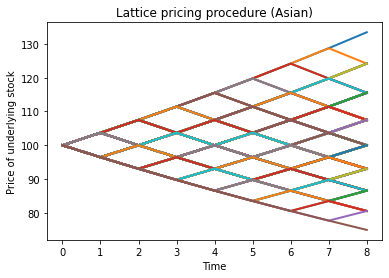

In [ ]:
Lattice_paths, Lattice_prob = Lattice_approach (S0, K, T, r, sigma, numSteps)

In [ ]:
def Lattice_Asian_Option (S0, K, T, r, sigma, numSteps, Lattice_paths, Lattice_prob):
    
    # Calculate the payoff for each path for Call & Put 
    CallPayoffT = np.maximum(Lattice_paths.mean(axis=0)-K,0)
    PutPayoffT = np.maximum(K - Lattice_paths.mean(axis=0), 0)

    # Discount back
    c = np.dot(CallPayoffT, Lattice_prob[numSteps]) * np.exp(-r * T)
    p = np.dot(PutPayoffT, Lattice_prob[numSteps]) * np.exp(-r * T)
 
    return c,p

In [ ]:
# Implement lattice pricing procedure  

Lattice_asian_call, Lattice_asian_put = Lattice_Asian_Option (S0, K, T, r, sigma, numSteps, Lattice_paths, Lattice_prob)

print('Lattice price of an Asian call option = ', np.around(Lattice_asian_call,4)) 
print('Lattice price of an Asian put option = ', np.around(Lattice_asian_put,4)) 

Lattice price of an Asian call option =  0.6925
Lattice price of an Asian put option =  5.5095


### Fixed Lookback Option - Approach 1

In [ ]:
def Lattice_Lookback_Option (S0, K, T, r, sigma, numSteps, Lattice_paths, Lattice_prob):
    
    # Calculate the payoff for each path for Call & Put 
    CallPayoffT = np.maximum(Lattice_paths.max(axis=0)-K,0)
    PutPayoffT = np.maximum(K - Lattice_paths.min(axis=0), 0)

    # Discount back
    c = np.dot(CallPayoffT, Lattice_prob[numSteps]) * np.exp(-r * T)
    p = np.dot(PutPayoffT, Lattice_prob[numSteps]) * np.exp(-r * T)
    
    return c,p

In [ ]:
# Implement Lattice pricing procedure for Lookback option

Lattice_Lookback_call, Lattice_Lookback_put = Lattice_Lookback_Option (S0, K, T, r, sigma, numSteps, Lattice_paths, Lattice_prob)

print('Lattice price of a Fixed Lookback call option = ', np.around(Lattice_Lookback_call,4)) 
print('Lattice price of a Fixed Lookback put option = ', np.around(Lattice_Lookback_put,4)) 

Lattice price of a Fixed Lookback call option =  3.575
Lattice price of a Fixed Lookback put option =  11.2485


### Fixed Lookback Option - Approach 2

In [ ]:
def build_lattice(S,r,sigma,T, N):
  deltaT = T/N
  # The amount the current asset price can go up
  u = np.exp(sigma * np.sqrt(deltaT))
  # The amount the current asset price can go down
  d = np.exp(-1* sigma * np.sqrt(deltaT))
  # The probability of an upward movement
  p = (np.exp(r*deltaT)-d)/(u-d)
  tree = list()
  for i in range(N+1):
    row=list()
    for j in range(i+1):
      # Build a dictionary to store the stock price, possible min and max location on each node
      node=dict()
      # Compute the stock price and store in the node with key=S
      node['S'] = S*(u**j)*(d**(i-j))
      # Store minimum and maximum stock prices and option price in the dictionary.
      # The key is the number of times that S multiplies by d. e.g. If S multiplies d once, the key is 1; if it times u twice, the key is -2.
      node['Smin_val']=dict()
      node['Smax_val']=dict()
      # Determine the possible historical max and min on each node, and initialize the corresponding option value as None
      mins = i-j-max(0,i-2*j)+1
      maxs = j-max(0,2*j-i)+1
      for k in range(mins):
        node['Smin_val'][i-j-k] = None
      for k in range(maxs):
        node['Smax_val'][-j+k]=None
      row.append(node)
    tree.append(row)
  return tree

In [ ]:
def lookback_call(S,K,r,sigma,T,N):
  deltaT = T/N
  # The amount the current asset price can go up
  u = np.exp(sigma * np.sqrt(deltaT))
  # The amount the current asset price can go down
  d = np.exp(-1* sigma * np.sqrt(deltaT))
  # The probability of an upward movement
  p = (np.exp(r*deltaT)-d)/(u-d)
  tree = build_lattice(S,r,sigma,T, N)
  # Calculate the call price on the terminal node.
  for node in tree[-1]:
    for num_d in node['Smax_val']:
      node['Smax_val'][num_d] = max(0,S*(d**num_d)-K)
  # Discount the call price to t=0.
  for i in range(N-1,-1,-1):
    for j in range(i+1):
      node=tree[i][j]
      for num_d in node['Smax_val']:
        node['Smax_val'][num_d]=np.exp(-r*deltaT)*(p*tree[i+1][j+1]['Smax_val'][min(num_d,i-2*j-1)]+(1-p)*tree[i+1][j]['Smax_val'][num_d])
  call=tree[0][0]['Smax_val'][0]
  return call, tree

In [ ]:
lookback_call(100,105,0.02,0.25,2/12,8)

(3.5749635678848013,
 [[{'S': 100.0, 'Smin_val': {0: None}, 'Smax_val': {0: 3.5749635678848013}}],
  [{'S': 96.45588891638907,
    'Smin_val': {1: None},
    'Smax_val': {0: 1.5557183352475392}},
   {'S': 103.67433354606588,
    'Smin_val': {0: None},
    'Smax_val': {-1: 5.623602685755486}}],
  [{'S': 93.0373850665079,
    'Smin_val': {2: None},
    'Smax_val': {0: 0.48224397158414206}},
   {'S': 100.0,
    'Smin_val': {1: None, 0: None},
    'Smax_val': {-1: 2.644529843454266, 0: 2.644529843454266}},
   {'S': 107.4836743622092,
    'Smin_val': {0: None},
    'Smax_val': {-2: 8.646334557421167}}],
  [{'S': 89.740036790464,
    'Smin_val': {3: None},
    'Smax_val': {0: 0.07497108993027206}},
   {'S': 96.45588891638909,
    'Smin_val': {2: None, 1: None},
    'Smax_val': {-1: 0.8952451194735441, 0: 0.8952451194735441}},
   {'S': 103.67433354606587,
    'Smin_val': {1: None, 0: None},
    'Smax_val': {-2: 5.204522422776586, -1: 4.418899060330647}},
   {'S': 111.43298306584406,
    'Smin

In [ ]:
def lookback_put(S,K,r,sigma,T,N):
  deltaT = T/N
  # The amount the current asset price can go up
  u = np.exp(sigma * np.sqrt(deltaT))
  # The amount the current asset price can go down
  d = np.exp(-1* sigma * np.sqrt(deltaT))
  # The probability of an upward movement
  p = (np.exp(r*deltaT)-d)/(u-d)
  tree = build_lattice(S,r,sigma,T, N)
  # Calculate the put price on the terminal node.
  for node in tree[-1]:
    for num_d in node['Smin_val']:
      node['Smin_val'][num_d] = max(0,K - S*(d**num_d))
  # Discount the put price to t=0.
  for i in range(N-1,-1,-1):
    for j in range(i+1):
      node=tree[i][j]
      for num_d in node['Smin_val']:
        node['Smin_val'][num_d]=np.exp(-r*deltaT)*(p*tree[i+1][j+1]['Smin_val'][num_d]+(1-p)*tree[i+1][j]['Smin_val'][max(num_d,i-2*j+1)])
  put=tree[0][0]['Smin_val'][0]
  return put, tree

In [ ]:
lookback_put(100,105,0.02,0.25,2/12,8)

(11.24850117452447,
 [[{'S': 100.0, 'Smin_val': {0: 11.24850117452447}, 'Smax_val': {0: None}}],
  [{'S': 96.45588891638907,
    'Smin_val': {1: 14.130841030147453},
    'Smax_val': {0: None}},
   {'S': 103.67433354606588,
    'Smin_val': {0: 8.337921667851417},
    'Smax_val': {-1: None}}],
  [{'S': 93.0373850665079,
    'Smin_val': {2: 16.862552076486928},
    'Smax_val': {0: None}},
   {'S': 100.0,
    'Smin_val': {1: 11.37527743610955, 0: 10.28625259257418},
    'Smax_val': {-1: None, 0: None}},
   {'S': 107.4836743622092,
    'Smin_val': {0: 6.371118187031809},
    'Smax_val': {-2: None}}],
  [{'S': 89.740036790464,
    'Smin_val': {3: 19.5172887244385},
    'Smax_val': {0: None}},
   {'S': 96.45588891638909,
    'Smin_val': {2: 14.187260836576483, 1: 13.136394473447863},
    'Smax_val': {-1: None, 0: None}},
   {'S': 103.67433354606587,
    'Smin_val': {1: 9.600683220798944, 0: 7.407484655043318},
    'Smax_val': {-2: None, -1: None}},
   {'S': 111.43298306584406,
    'Smin_val':

In [ ]:
tree=build_lattice(100,0.02,0.25,2/12,8)
tree

[[{'S': 100.0, 'Smin_val': {0: None}, 'Smax_val': {0: None}}],
 [{'S': 96.45588891638907, 'Smin_val': {1: None}, 'Smax_val': {0: None}},
  {'S': 103.67433354606588, 'Smin_val': {0: None}, 'Smax_val': {-1: None}}],
 [{'S': 93.0373850665079, 'Smin_val': {2: None}, 'Smax_val': {0: None}},
  {'S': 100.0,
   'Smin_val': {1: None, 0: None},
   'Smax_val': {-1: None, 0: None}},
  {'S': 107.4836743622092, 'Smin_val': {0: None}, 'Smax_val': {-2: None}}],
 [{'S': 89.740036790464, 'Smin_val': {3: None}, 'Smax_val': {0: None}},
  {'S': 96.45588891638909,
   'Smin_val': {2: None, 1: None},
   'Smax_val': {-1: None, 0: None}},
  {'S': 103.67433354606587,
   'Smin_val': {1: None, 0: None},
   'Smax_val': {-2: None, -1: None}},
  {'S': 111.43298306584406, 'Smin_val': {0: None}, 'Smax_val': {-3: None}}],
 [{'S': 86.55955020013666, 'Smin_val': {4: None}, 'Smax_val': {0: None}},
  {'S': 93.0373850665079,
   'Smin_val': {3: None, 2: None},
   'Smax_val': {-1: None, 0: None}},
  {'S': 100.0,
   'Smin_val':

### Floating lookback Lookback Option  - Approach 1

In [ ]:
def  Lattice_Floating_Lookback_Option (S0, K, T, r, sigma, numSteps, Lattice_paths, Lattice_prob):
    
    # Calculate the payoff for each path for Call & Put 
    CallPayoffT = np.maximum(Lattice_paths[numSteps] - Lattice_paths.min(axis=0), 0)
    PutPayoffT = np.maximum(Lattice_paths.max(axis=0) - Lattice_paths[numSteps], 0)
        
    # Discount back
    c = np.dot(CallPayoffT, Lattice_prob[numSteps]) * np.exp(-r * T)
    p = np.dot(PutPayoffT, Lattice_prob[numSteps]) * np.exp(-r * T)
  
    return c,p

In [ ]:
# Implement Lattice pricing procedure for Floating Lookback option

Lattice_Floating_Lookback_call, Lattice_Floating_Lookback_put = Lattice_Floating_Lookback_Option (S0, K, T, r, sigma, numSteps, Lattice_paths, Lattice_prob)

print('Lattice price of a Floating Lookback call option = ', np.around(Lattice_Floating_Lookback_call,4)) 
print('Lattice price of a Floating Lookback put option = ', np.around(Lattice_Floating_Lookback_put,4)) 

Lattice price of a Floating Lookback call option =  6.5979
Lattice price of a Floating Lookback put option =  6.5478


### Floating lookback Lookback Option  - Approach 2

In [ ]:
def floating_lookback_call(S,K,r,sigma,T,N):
    deltaT = T/N
  # The amount the current asset price can go up
    u = np.exp(sigma * np.sqrt(deltaT))
  # The amount the current asset price can go down
    d = np.exp(-1* sigma * np.sqrt(deltaT))
  # The probability of an upward movement
    p = (np.exp(r*deltaT)-d)/(u-d)
    tree = build_lattice(S,r,sigma,T, N)
  # Calculate the call price on the terminal node.
    for node in tree[-1]:
        for num_d in node["Smin_val"]:
            node["Smin_val"][num_d] = max(0,node["S"]-S*(d**num_d))
  # Discount the call price to t=0.
    for i in range(N-1,-1,-1):
        for j in range(i+1):
            node=tree[i][j]
            for num_d in node["Smin_val"]:
                node['Smin_val'][num_d]=np.exp(-r*deltaT)*(p*tree[i+1][j+1]['Smin_val'][num_d]+(1-p)*tree[i+1][j]['Smin_val'][max(num_d,i-2*j+1)])
    call=tree[0][0]["Smin_val"][0]
    return call, tree

In [ ]:
floating_lookback_call(100,105,0.02,0.25,2/12,8)

(6.597918488799541,
 [[{'S': 100.0, 'Smin_val': {0: 6.597918488799541}, 'Smax_val': {0: None}}],
  [{'S': 96.45588891638907,
    'Smin_val': {1: 5.892533765845412},
    'Smax_val': {0: None}},
   {'S': 103.67433354606588,
    'Smin_val': {0: 7.318059033226174},
    'Smax_val': {-1: None}}],
  [{'S': 93.0373850665079,
    'Smin_val': {2: 5.162109291261519},
    'Smax_val': {0: None}},
   {'S': 100.0,
    'Smin_val': {1: 6.637449584376251, 0: 5.548424740840878},
    'Smax_val': {-1: None, 0: None}},
   {'S': 107.4836743622092,
    'Smin_val': {0: 9.116964697507715},
    'Smax_val': {-2: None}}],
  [{'S': 89.740036790464,
    'Smin_val': {3: 4.475847808476099},
    'Smax_val': {0: None}},
   {'S': 96.45588891638909,
    'Smin_val': {2: 5.86167204653915, 1: 4.810805683410528},
    'Smax_val': {-1: None, 0: None}},
   {'S': 103.67433354606587,
    'Smin_val': {1: 8.493539060438414, 0: 6.300340494682786},
    'Smax_val': {-2: None, -1: None}},
   {'S': 111.43298306584406,
    'Smin_val': {0:

In [ ]:
def floating_lookback_put(S,K,r,sigma,T,N):
    deltaT = T/N
  # The amount the current asset price can go up
    u = np.exp(sigma * np.sqrt(deltaT))
  # The amount the current asset price can go down
    d = np.exp(-1* sigma * np.sqrt(deltaT))
  # The probability of an upward movement
    p = (np.exp(r*deltaT)-d)/(u-d)
    tree = build_lattice(S,r,sigma,T, N)
  # Calculate the put price on the terminal node.
    for node in tree[-1]:
        for num_d in node["Smax_val"]:
            node["Smax_val"][num_d] = max(0, S*d**num_d-node["S"])
  # Discount the put price to t=0.
    for i in range(N-1,-1,-1):
        for j in range(i+1):
            node=tree[i][j]
            for num_d in node["Smax_val"]:
                node["Smax_val"][num_d]=np.exp(-r*deltaT)*(p*tree[i+1][j+1]["Smax_val"][min(num_d, i-2*j-1)]+(1-p)*tree[i+1][j]['Smax_val'][num_d])
    put=tree[0][0]["Smax_val"][0]
    return put, tree

In [ ]:
floating_lookback_put(100,105,0.02,0.25,2/12,8)

(6.547840890187834,
 [[{'S': 100.0, 'Smin_val': {0: None}, 'Smax_val': {0: 6.547840890187834}}],
  [{'S': 96.45588891638907,
    'Smin_val': {1: None},
    'Smax_val': {0: 6.821816091280393}},
   {'S': 103.67433354606588,
    'Smin_val': {0: None},
    'Smax_val': {-1: 6.2757777512674995}}],
  [{'S': 93.0373850665079,
    'Smin_val': {2: None},
    'Smax_val': {0: 8.142433088019514}},
   {'S': 100.0,
    'Smin_val': {1: None, 0: None},
    'Smax_val': {-1: 6.651422293861045, 0: 5.489659785039741}},
   {'S': 107.4836743622092,
    'Smin_val': {0: None},
    'Smax_val': {-2: 5.900488046945264}}],
  [{'S': 89.740036790464,
    'Smin_val': {3: None},
    'Smax_val': {0: 10.390107193240489}},
   {'S': 96.45588891638909,
    'Smin_val': {2: None, 1: None},
    'Smax_val': {-1: 8.18170656435478, 0: 5.872209543067396}},
   {'S': 103.67433354606587,
    'Smin_val': {1: None, 0: None},
    'Smax_val': {-2: 6.311666583137123, -1: 5.106715086186817}},
   {'S': 111.43298306584406,
    'Smin_val': {

#### Print All Results

In [ ]:
print('Lattice price of an Asian call option = ', np.around(Lattice_asian_call,4)) 
print('Lattice price of an Asian put option = ', np.around(Lattice_asian_put,4)) 
print('')

print('Lattice price of a Fixed Lookback call option = ', np.around(Lattice_Lookback_call,4)) 
print('Lattice price of a Fixed Lookback put option = ', np.around(Lattice_Lookback_put,4)) 
print('')

print('Lattice price of a Floating Lookback call option = ', np.around(Lattice_Floating_Lookback_call,4)) 
print('Lattice price of a Floating Lookback put option = ', np.around(Lattice_Floating_Lookback_put,4)) 

Lattice price of an Asian call option =  0.6925
Lattice price of an Asian put option =  5.5095

Lattice price of a Fixed Lookback call option =  3.575
Lattice price of a Fixed Lookback put option =  11.2485

Lattice price of a Floating Lookback call option =  6.5979
Lattice price of a Floating Lookback put option =  6.5478


### American Put Option

In [ ]:
def american_put_lattice(S,K,r,sigma,T, N):
  # S is the current price of the underlying stock; K is the strike price; r is the risk-free rate; sigma is the volatility; t is time to maturity/52 if unit time is 1 week, N is the number of steps
  deltaT = T/N
  # The amount the current asset price can go up
  u = np.exp(sigma * np.sqrt(deltaT))
  # The amount the current asset price can go down
  d = np.exp(-1* sigma * np.sqrt(deltaT))
  # The probability of an upward movement
  p = (np.exp(r*deltaT)-d)/(u-d)
  # Initialize the stock prices and the value of put options
  prices = np.zeros([N+1,N+1])
  puts = np.zeros([N+1,N+1])
  # Build the stock prices tree
  for i in range(N+1):
    for j in range(i+1):
      prices[j,i]= S*(d**j)*(u**(i-j))
  # Find the value of put option at maturity
  puts[:,N] = np.maximum(np.zeros(N+1),K-prices[:,N])
  # Using backwards induction finds the option price
  for i in np.arange(N-1,-1,-1):
    for j in np.arange(0, i+1):
      put_val = np.exp(-r*deltaT)*(p*puts[j,i+1]+(1-p)*puts[j+1,i+1])
      # Check whether excercise early or not
      puts[j,i] = np.maximum(K-prices[j,i], put_val)
  return[puts[0,0], np.round(prices,1), np.round(puts,1)]

In [ ]:
Ame_put_price_lattice, Ame_tree1,Ame_tree2 = american_put_lattice(100,105,0.02,0.25,2/12,8)
print('Lattice price of an American put option = ', np.around(Ame_put_price_lattice,4)) 

Lattice price of an American put option =  7.0322


In [ ]:
Ame_tree1 

array([[100. , 103.7, 107.5, 111.4, 115.5, 119.8, 124.2, 128.7, 133.5],
       [  0. ,  96.5, 100. , 103.7, 107.5, 111.4, 115.5, 119.8, 124.2],
       [  0. ,   0. ,  93. ,  96.5, 100. , 103.7, 107.5, 111.4, 115.5],
       [  0. ,   0. ,   0. ,  89.7,  93. ,  96.5, 100. , 103.7, 107.5],
       [  0. ,   0. ,   0. ,   0. ,  86.6,  89.7,  93. ,  96.5, 100. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,  83.5,  86.6,  89.7,  93. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  80.5,  83.5,  86.6],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  77.7,  80.5],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  74.9]])

In [ ]:
Ame_tree2

array([[ 7. ,  4.6,  2.6,  1.2,  0.3,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  9.4,  6.6,  4.1,  2. ,  0.6,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 12.2,  9.1,  6.1,  3.4,  1.3,  0. ,  0. ],
       [ 0. ,  0. ,  0. , 15.3, 12. ,  8.8,  5.5,  2.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 18.4, 15.3, 12. ,  8.5,  5. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , 21.5, 18.4, 15.3, 12. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , 24.5, 21.5, 18.4],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 27.3, 24.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 30.1]])